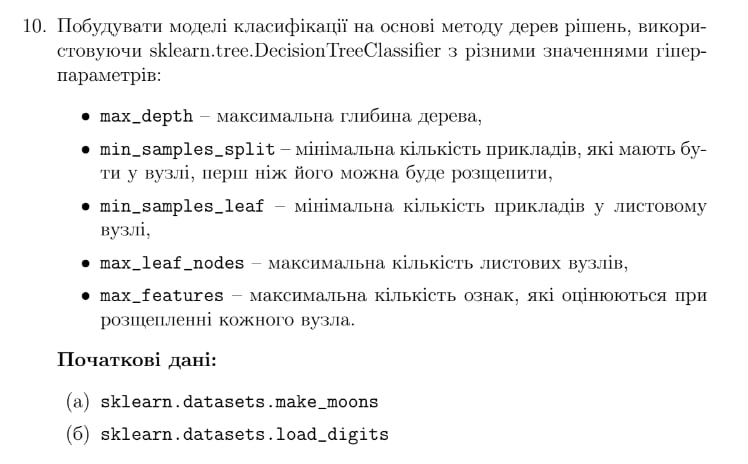

In [296]:
import pandas as pd
import numpy as np
import sklearn.datasets
import sklearn.metrics as metrics
# бібліотеки для візуалізації
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
import sklearn.metrics
# візуалізація границь рішень, встановлюється через:
# pip install git+https://github.com/PanWu/pylib.git
import pylib.plot

X, y = sklearn.datasets.make_moons(n_samples=(300, 300), noise=0.25, random_state=17)

In [297]:
def draw_tree(model_tree):
    plt.figure(figsize=(20, 15))
    plot_tree(model_tree, feature_names=["x1", "x2"], filled=True)
    plt.show

In [298]:
def draw_moons(X, y):
    plt.figure(figsize=(11, 8))
    plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    s=100,
    cmap="winter",
    edgecolors="black",
    linewidth=1.5
    )
    plt.show()


In [299]:
def confussion_matrix(y_true, y_predicted):
    confussion = metrics.confusion_matrix(y_true, y_predicted)
    sns.heatmap(confussion, annot=True, fmt='g', cmap='Blues')
    print(f'accuracy: {metrics.accuracy_score(y_true, y_predicted)} \n \
    precision: {metrics.precision_score(y_true, y_predicted)} \n \
    recall: {metrics.recall_score(y_true, y_predicted)} \n \
    f1_score: {metrics.f1_score(y_true, y_predicted)}')

In [300]:
def pr_curve(y_true, y_predicted):
    precision, recall, _ = metrics.precision_recall_curve(y_true, y_predicted)
    print(f'auc pr curve: {metrics.auc(recall, precision)}')
    plt.plot(recall, precision)
    plt.title('Precision-Recall Curve', size=20)
    plt.xlabel('Recall', size=14)
    plt.ylabel('Precision', size=14)

In [301]:
def roc_curve(y_true, y_predicted):
    fpr, tpr, _ = metrics.roc_curve(y_true, y_predicted)
    print(f'roc auc:{metrics.roc_auc_score(y_true, y_predicted)}')
    plt.plot(fpr, tpr)
    plt.title('ROC curve', size=20)
    plt.xlabel('False positive rate', size=14)
    plt.ylabel('True positive rate', size=14)


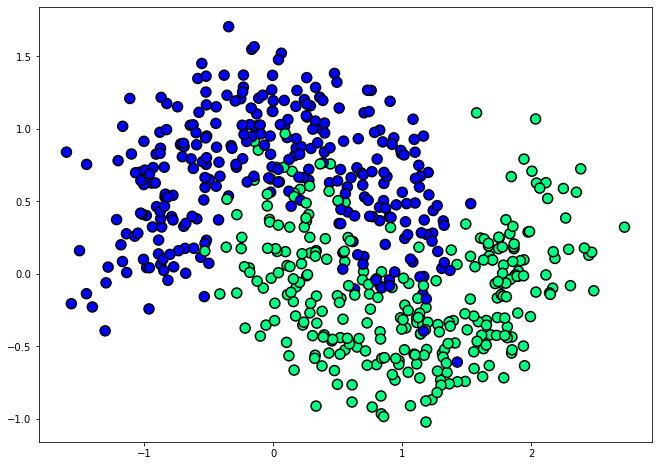

In [302]:
draw_moons(X, y)

In [303]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size=0.2,
                     random_state=17)

Як коефіцієнт оцінки будемо використовувати ентропію, адже датасет не великий

<font size='5'> max_depth: </font> <br>
Ми будемо перевіряти такі значення: 
- 3
- 7
- None (default)

<font size='5'> 3:</font>

In [304]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [305]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

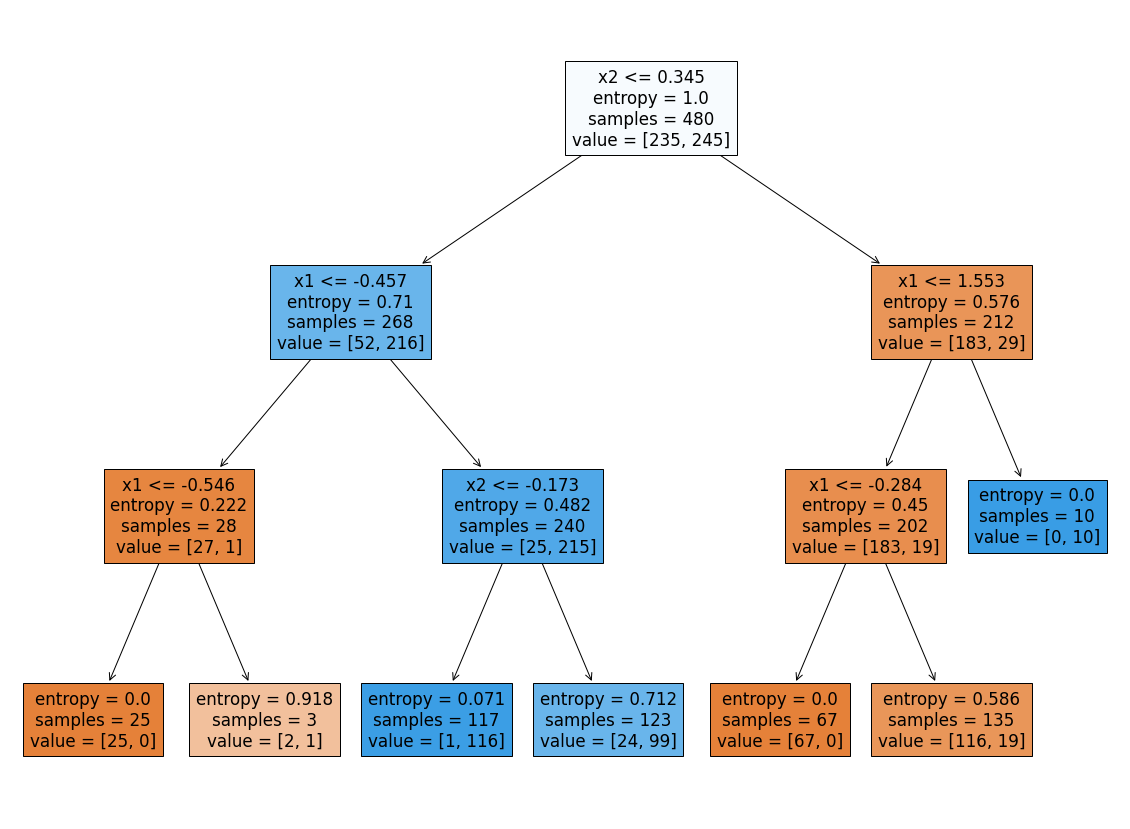

In [306]:
draw_tree(model_tree)

(<Figure size 432x432 with 1 Axes>, None, None)

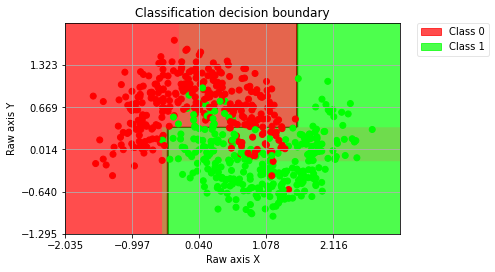

In [307]:
pylib.plot.plot_decision_boundary(model_tree, X=X, Y=y)

In [308]:
predict = model_tree.predict(X_test)

accuracy: 0.8666666666666667 
     precision: 0.8545454545454545 
     recall: 0.8545454545454545 
     f1_score: 0.8545454545454545


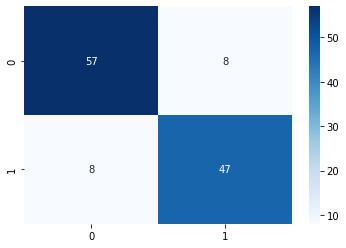

In [309]:
confussion_matrix(y_test, predict)

auc pr curve: 0.8878787878787879


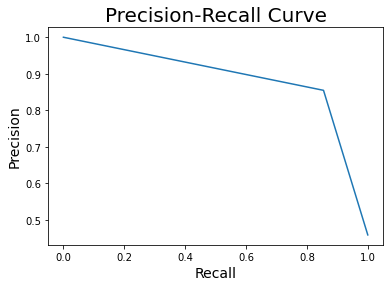

In [310]:
pr_curve(y_test, predict)

roc auc:0.8657342657342657


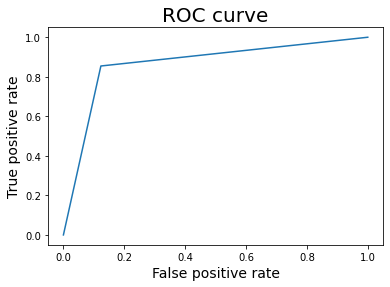

In [311]:
roc_curve(y_test, predict)

In [312]:
predict = model_tree.predict(X_train)

accuracy: 0.90625 
     precision: 0.9 
     recall: 0.9183673469387755 
     f1_score: 0.9090909090909091


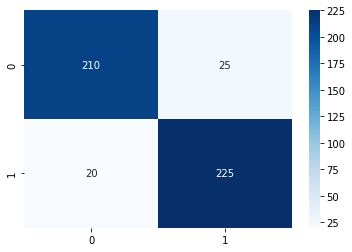

In [313]:
confussion_matrix(y_train, predict)

auc pr curve: 0.9300170068027211


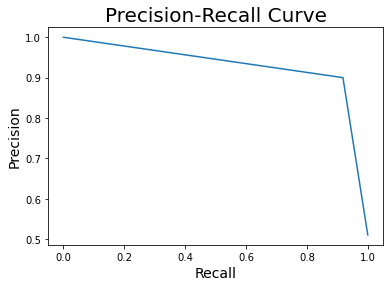

In [314]:
pr_curve(y_train, predict)

roc auc:0.9059921841076856


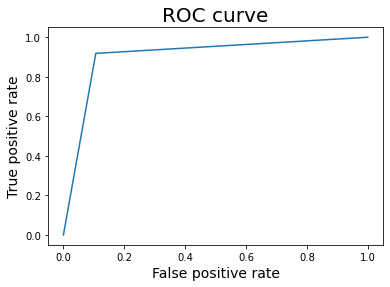

In [315]:
roc_curve(y_train, predict)

<font size='5'> 7: </font>

In [316]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [317]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

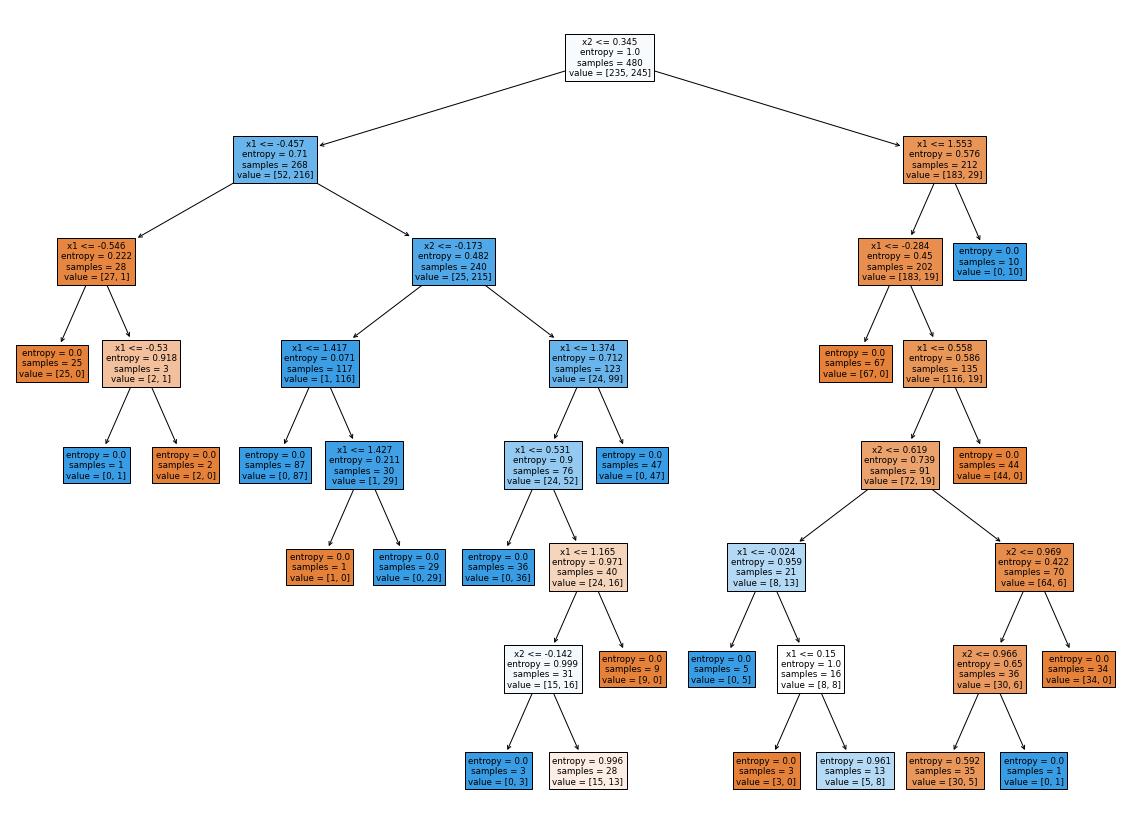

In [318]:
draw_tree(model_tree)

(<Figure size 432x432 with 1 Axes>, None, None)

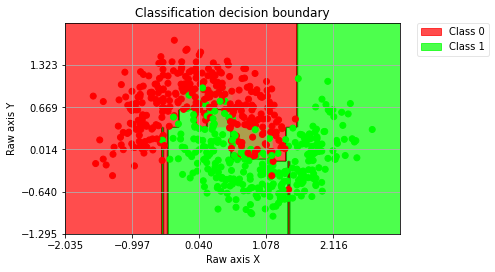

In [319]:
pylib.plot.plot_decision_boundary(model_tree, X=X, Y=y)

In [320]:
predict = model_tree.predict(X_test)

accuracy: 0.8916666666666667 
     precision: 0.9565217391304348 
     recall: 0.8 
     f1_score: 0.8712871287128713


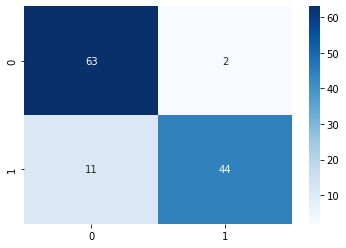

In [321]:
confussion_matrix(y_test, predict)

auc pr curve: 0.9240942028985507


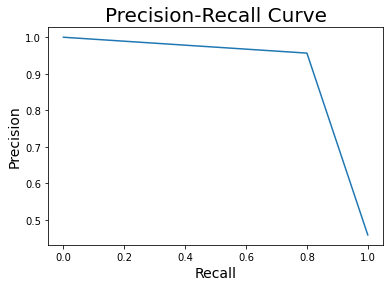

In [322]:
pr_curve(y_test, predict)

roc auc:0.8846153846153847


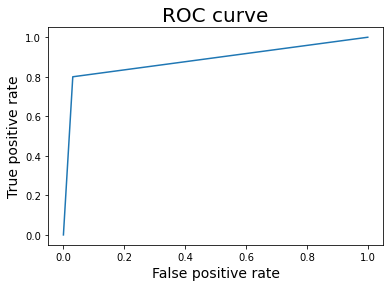

In [323]:
roc_curve(y_test, predict)

In [324]:
predict = model_tree.predict(X_train)

accuracy: 0.9520833333333333 
     precision: 0.978448275862069 
     recall: 0.926530612244898 
     f1_score: 0.9517819706498952


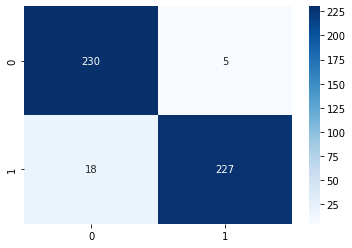

In [325]:
confussion_matrix(y_train, predict)

auc pr curve: 0.9712394440534834


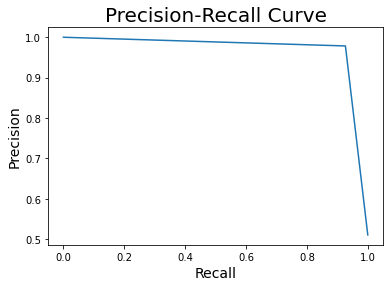

In [326]:
pr_curve(y_train, predict)

roc auc:0.9526270082501085


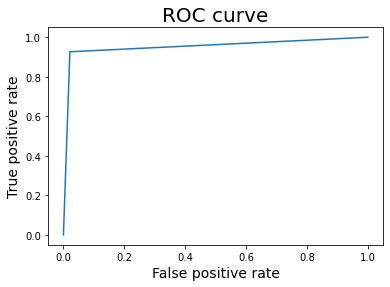

In [327]:
roc_curve(y_train, predict)

<font size='5'> None: </font>

In [328]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None)

In [329]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

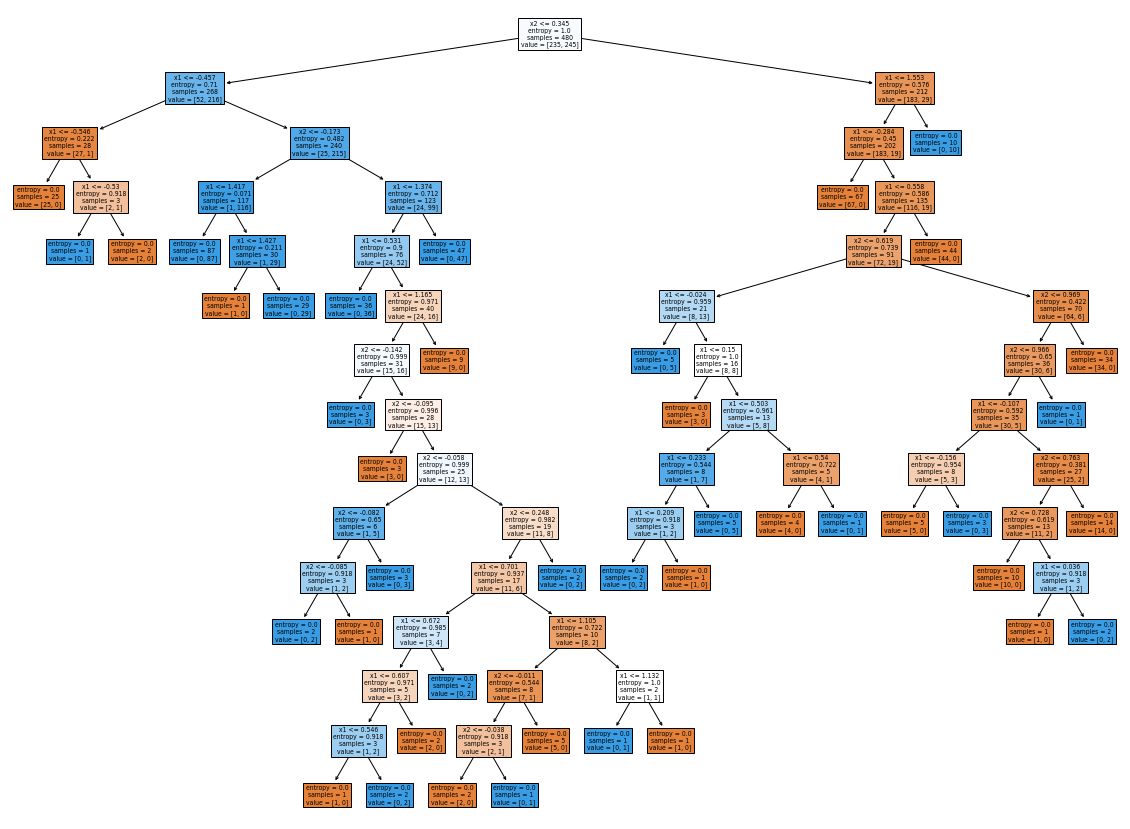

In [330]:
draw_tree(model_tree)

(<Figure size 432x432 with 1 Axes>, None, None)

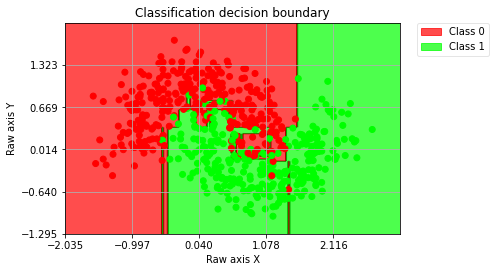

In [331]:
pylib.plot.plot_decision_boundary(model_tree, X=X, Y=y)

In [332]:
predict = model_tree.predict(X_test)

accuracy: 0.8916666666666667 
     precision: 0.8888888888888888 
     recall: 0.8727272727272727 
     f1_score: 0.8807339449541284


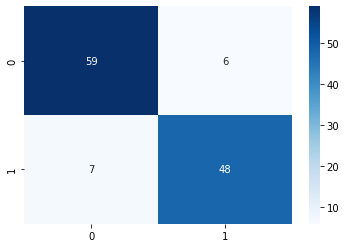

In [333]:
confussion_matrix(y_test, predict)

auc pr curve: 0.9099747474747475


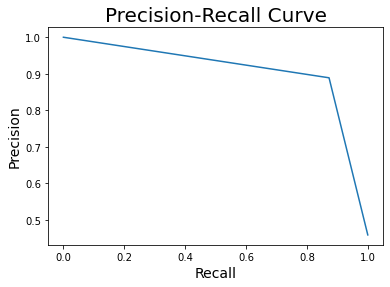

In [334]:
pr_curve(y_test, predict)

roc auc:0.8902097902097901


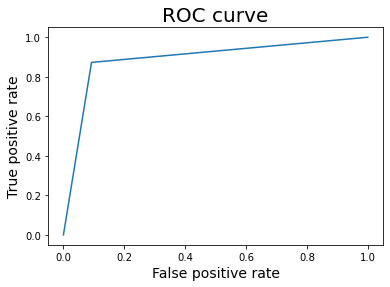

In [335]:
roc_curve(y_test, predict)

In [336]:
predict = model_tree.predict(X_train)

accuracy: 1.0 
     precision: 1.0 
     recall: 1.0 
     f1_score: 1.0


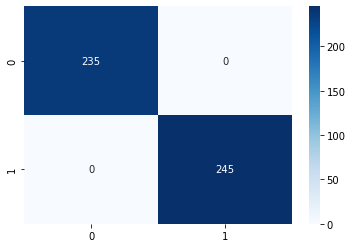

In [337]:
confussion_matrix(y_train, predict)

auc pr curve: 1.0


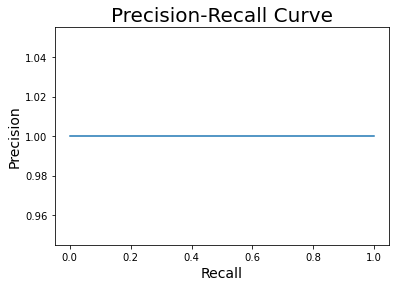

In [338]:
pr_curve(y_train, predict)

roc auc:1.0


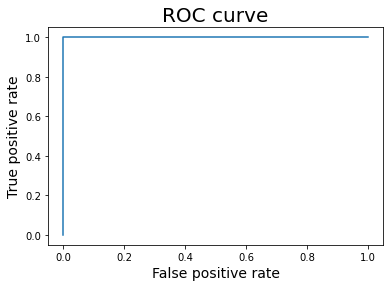

In [339]:
roc_curve(y_train, predict)

- <b> 3 </b> <br>
Достатня точність, AUC має достатнє значення <br>
- <b>7 </b><br>
Більша точність для обох випадків, усі інші параметри також мають краще значення окрім Recall (означає скільки фактичних випадків першого класу ми змогли правильно передбачити за допомогою нашої моделі), обидва AUC також дають гарне значення <br>
- <b> None (default)</b><br>
Значення для тесту таке ж саме як і для max_depth=7, для навчальної множини ми отримали значення 1 усюди, що каже нам про перенавченість моделі (точність на тестовій сильно гірша ніж на навчальній), оскільки це default значення параметру, то зрозуміло, що у дереві рішень потрібно налаштовувати гіперпараметри <br> 
<b>Найкращим вийшло значення з max_depth=7, вона не перенавчана і має високе значення точності для тестової вибірки </b>

<font size='5'> min_samples_split: </font> <br>
Ми будемо перевіряти такі значення: 
- 2 (default)
- 5
- 10

In [340]:
model_tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=2)

In [341]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

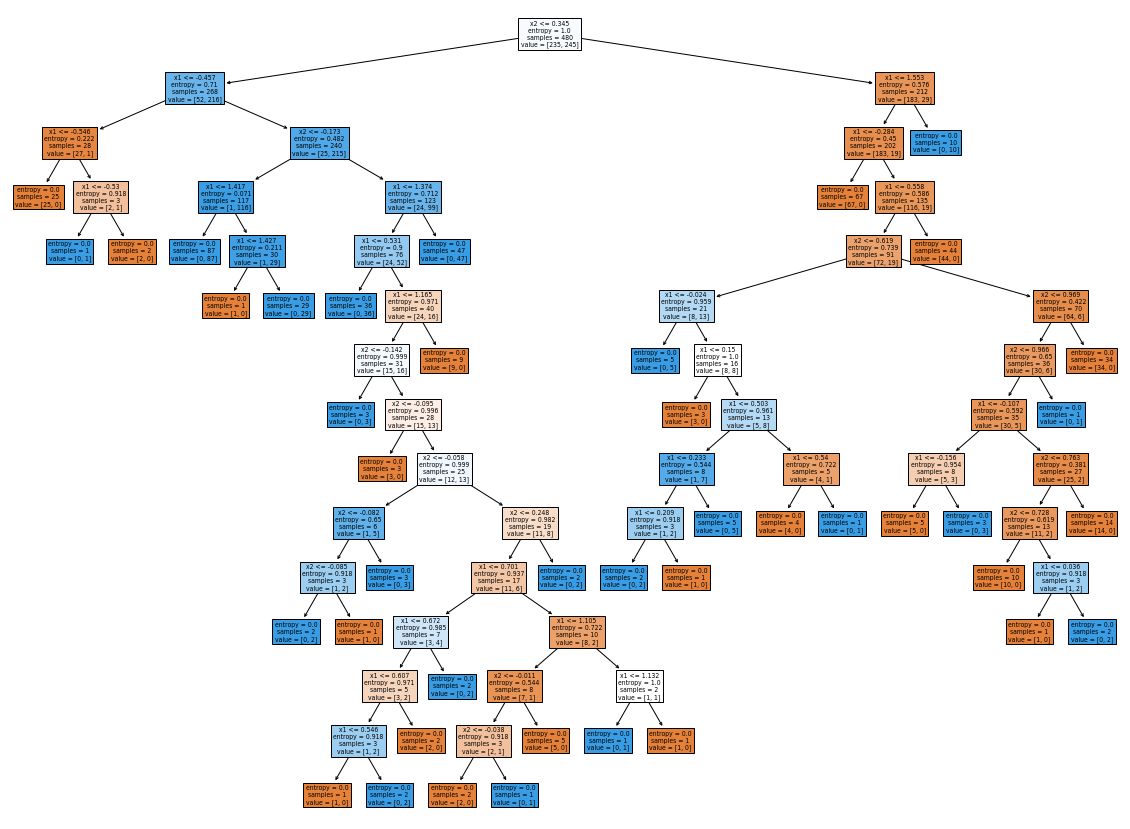

In [342]:
draw_tree(model_tree)

(<Figure size 432x432 with 1 Axes>, None, None)

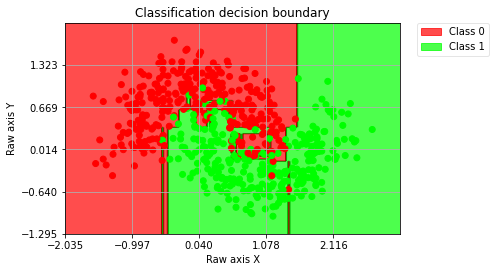

In [343]:
pylib.plot.plot_decision_boundary(model_tree, X=X, Y=y)

In [344]:
predict = model_tree.predict(X_test)

accuracy: 0.8916666666666667 
     precision: 0.8888888888888888 
     recall: 0.8727272727272727 
     f1_score: 0.8807339449541284


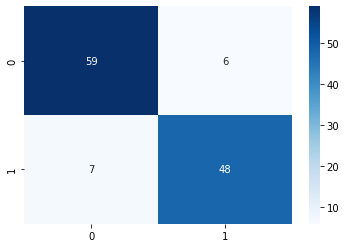

In [345]:
confussion_matrix(y_test, predict)

auc pr curve: 0.9099747474747475


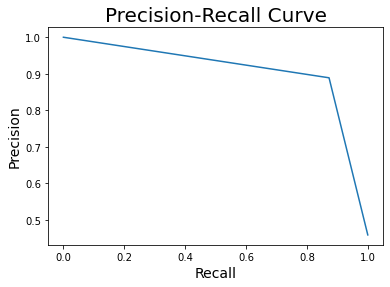

In [346]:
pr_curve(y_test, predict)

roc auc:0.8902097902097901


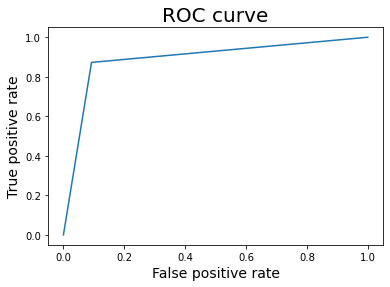

In [347]:
roc_curve(y_test, predict)

In [348]:
predict = model_tree.predict(X_train)

accuracy: 1.0 
     precision: 1.0 
     recall: 1.0 
     f1_score: 1.0


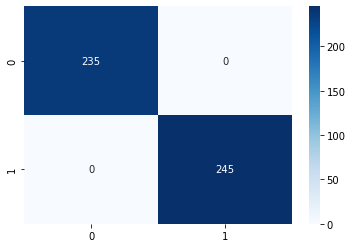

In [349]:
confussion_matrix(y_train, predict)

auc pr curve: 1.0


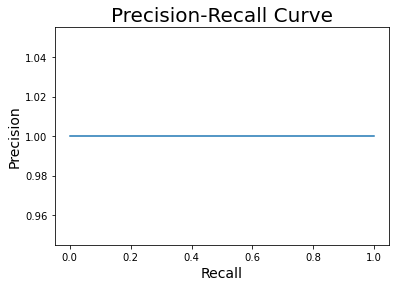

In [350]:
pr_curve(y_train, predict)

roc auc:1.0


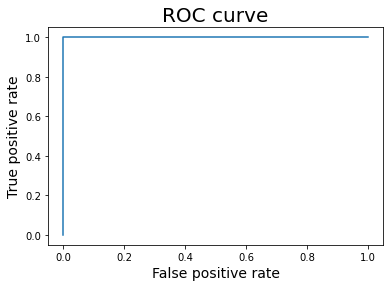

In [351]:
roc_curve(y_train, predict)

<font size='5'> 5: </font>

In [352]:
model_tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [353]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

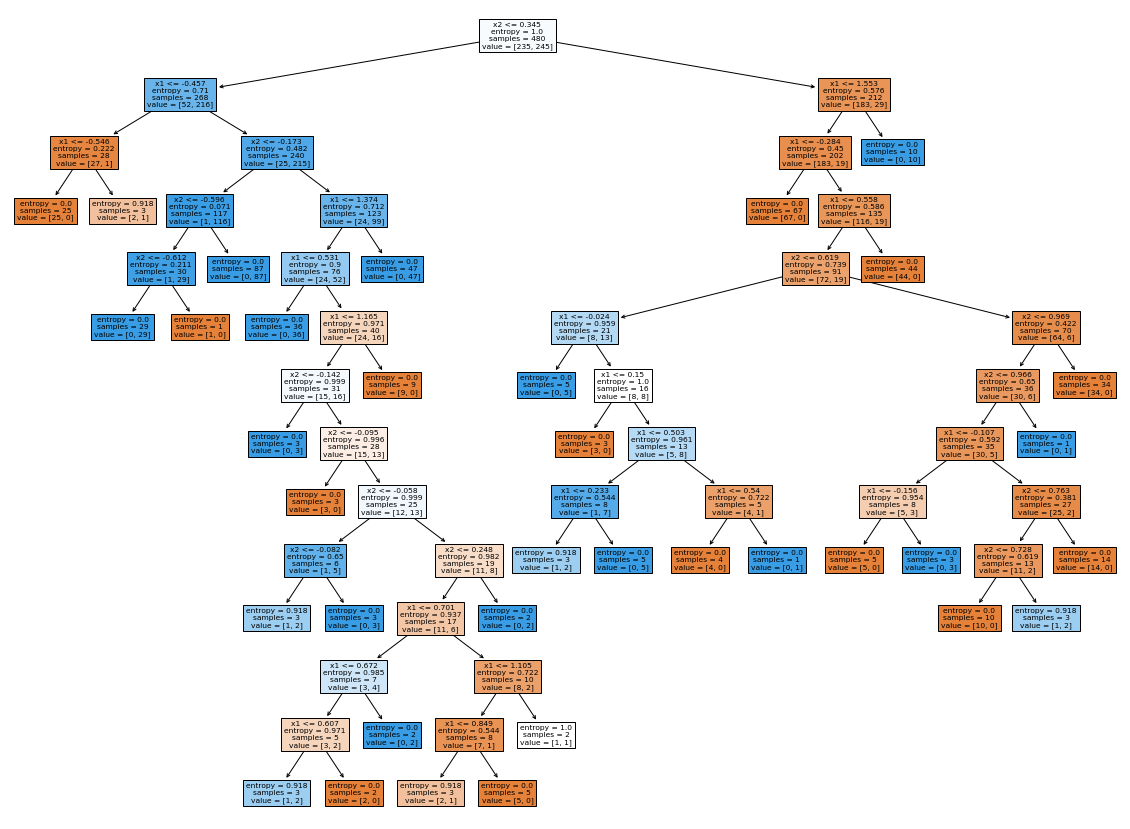

In [354]:
draw_tree(model_tree)

(<Figure size 432x432 with 1 Axes>, None, None)

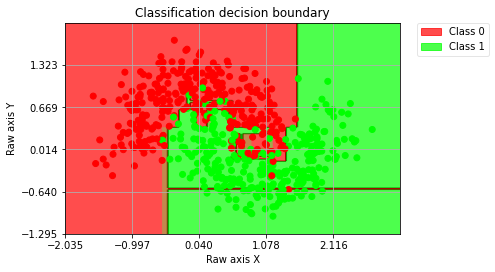

In [355]:
pylib.plot.plot_decision_boundary(model_tree, X=X, Y=y)

In [356]:
predict = model_tree.predict(X_test)

accuracy: 0.8833333333333333 
     precision: 0.8867924528301887 
     recall: 0.8545454545454545 
     f1_score: 0.8703703703703703


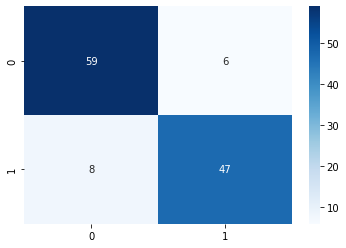

In [357]:
confussion_matrix(y_test, predict)

auc pr curve: 0.9040022870211549


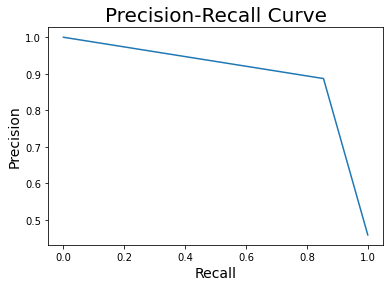

In [358]:
pr_curve(y_test, predict)

roc auc:0.8811188811188811


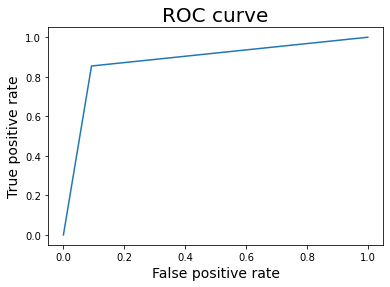

In [359]:
roc_curve(y_test, predict)

In [360]:
predict = model_tree.predict(X_train)

accuracy: 0.9854166666666667 
     precision: 0.983739837398374 
     recall: 0.9877551020408163 
     f1_score: 0.9857433808553971


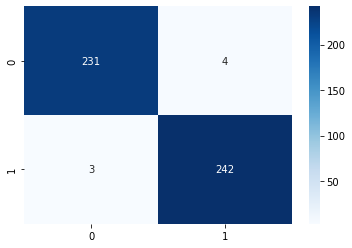

In [361]:
confussion_matrix(y_train, predict)

auc pr curve: 0.9888724697195953


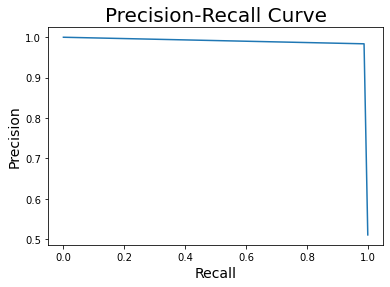

In [362]:
pr_curve(y_train, predict)

roc auc:0.9853669127225357


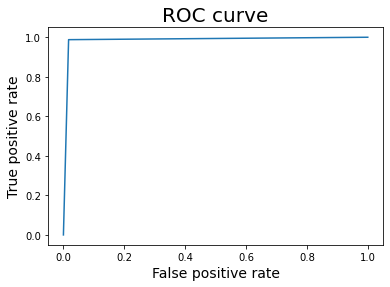

In [363]:
roc_curve(y_train, predict)

<font size='5'> 10: </font>

In [364]:
model_tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=10)

In [365]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=10)

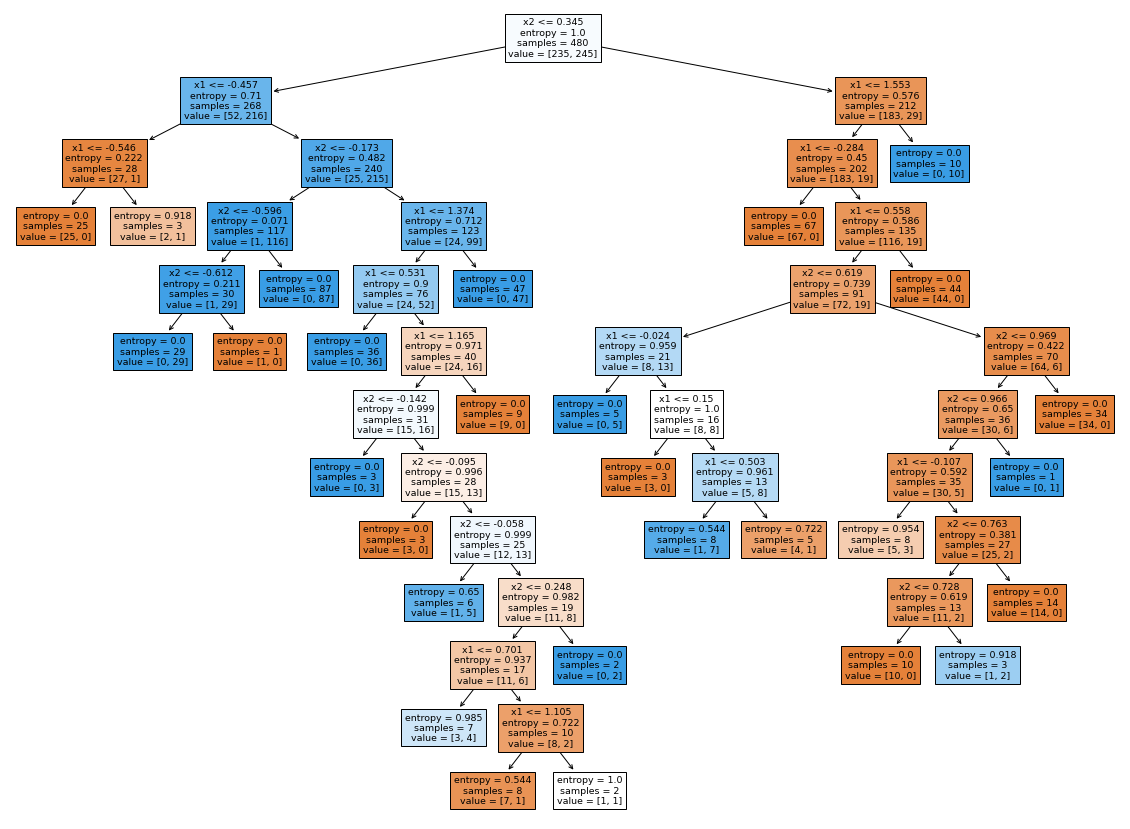

In [366]:
draw_tree(model_tree)

(<Figure size 432x432 with 1 Axes>, None, None)

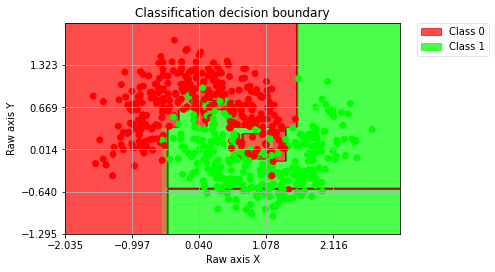

In [367]:
pylib.plot.plot_decision_boundary(model_tree, X=X, Y=y)

In [368]:
predict = model_tree.predict(X_test)

accuracy: 0.8916666666666667 
     precision: 0.9038461538461539 
     recall: 0.8545454545454545 
     f1_score: 0.8785046728971962


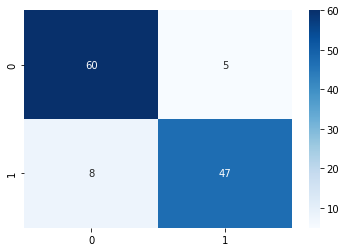

In [369]:
confussion_matrix(y_test, predict)

auc pr curve: 0.9125291375291374


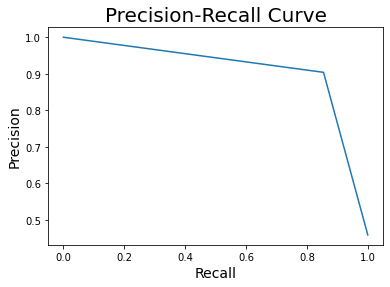

In [370]:
pr_curve(y_test, predict)

roc auc:0.8888111888111888


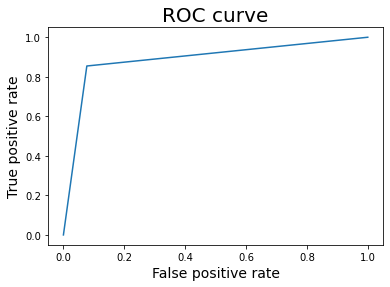

In [371]:
roc_curve(y_test, predict)

In [372]:
predict = model_tree.predict(X_train)

accuracy: 0.9729166666666667 
     precision: 0.9754098360655737 
     recall: 0.9714285714285714 
     f1_score: 0.9734151329243353


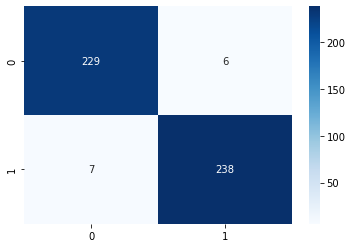

In [373]:
confussion_matrix(y_train, predict)

auc pr curve: 0.9807108704137392


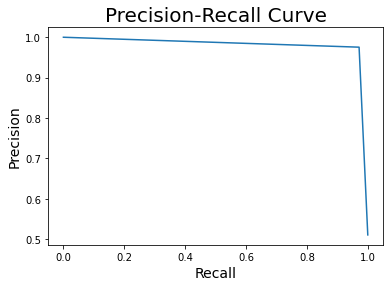

In [374]:
pr_curve(y_train, predict)

roc auc:0.9729483282674772


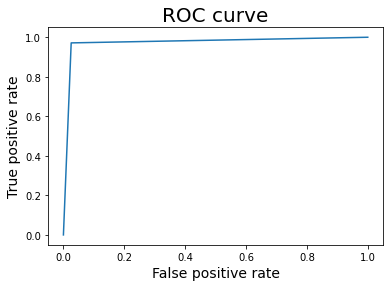

In [375]:
roc_curve(y_train, predict)


- <b> 2 (default) </b> <br>
Є ознаки перенавчання (оскільки ознака яка стоїть на default, то це дерево повторюється багато разів) <br>
- <b>5 </b><br>
Точність на тестовій гірша ніж у default, загалом є ознаки не сильного перенавчання <br>
- <b> 10 </b><br>
Схоже на min_samples_split=5, але точність на тестовій виборці стала краще на 0.01, а на навчальній гірше на ті ж самі 0.01 <br> 
<b>Найкращим вийшло значення з на min_samples_split=10, хоч вона і не отримала найкращі результати, але вона порівняно вона має найменше перенавчання і достатні значення точності, можливо має сенс ще збільшити значення, але це вже буде підбір значень, загалом зрозуміло, що завдяки цьому гіперпараметру можна створити модель з найкращим відношенням точності і перенавчання</b>


<font size='5'> min_samples_leaf: </font> <br>
Ми будемо перевіряти такі значення: 
- 1 (default)
- 10
- 30

In [376]:
model_tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1)

In [377]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

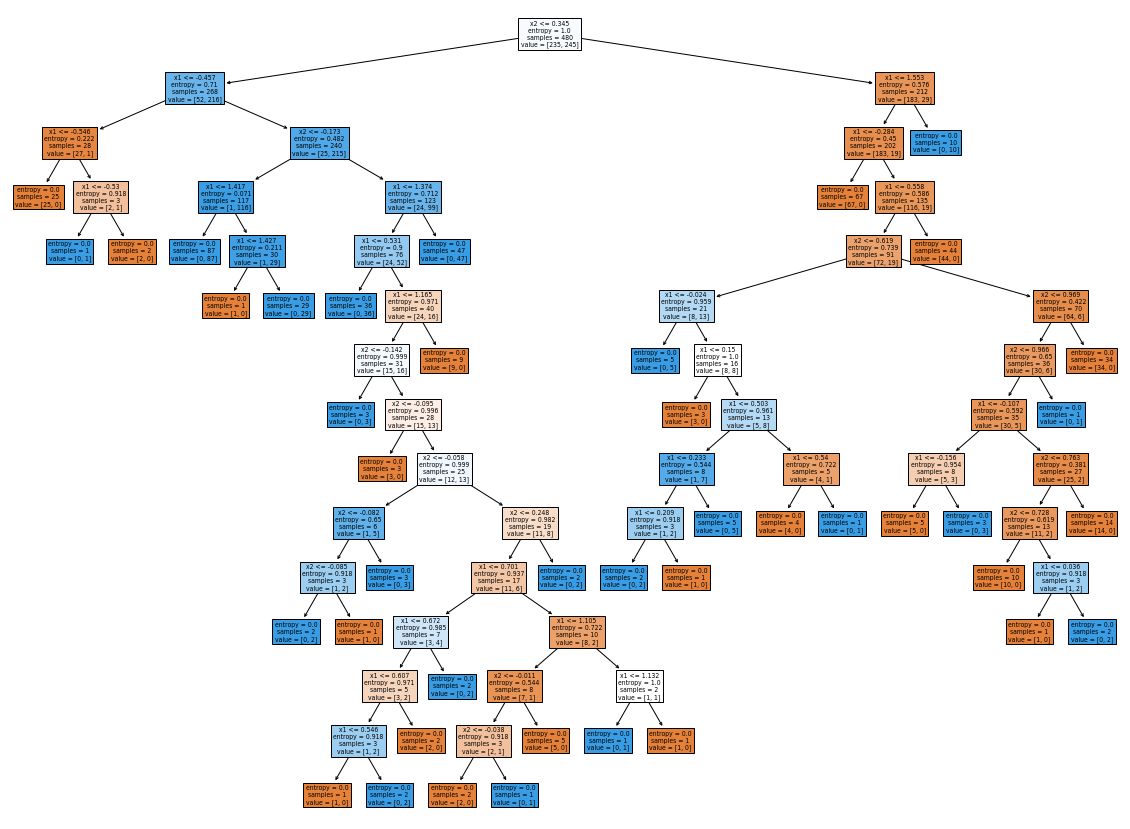

In [378]:
draw_tree(model_tree)

(<Figure size 432x432 with 1 Axes>, None, None)

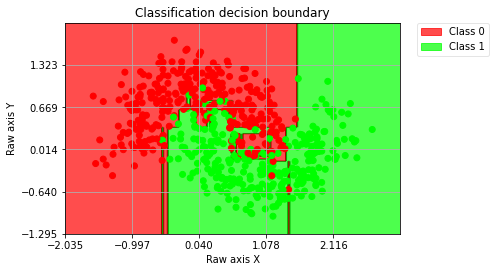

In [379]:
pylib.plot.plot_decision_boundary(model_tree, X=X, Y=y)

In [380]:
predict = model_tree.predict(X_test)

accuracy: 0.8916666666666667 
     precision: 0.8888888888888888 
     recall: 0.8727272727272727 
     f1_score: 0.8807339449541284


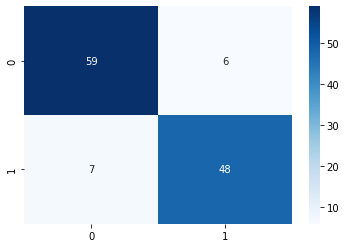

In [381]:
confussion_matrix(y_test, predict)

auc pr curve: 0.9099747474747475


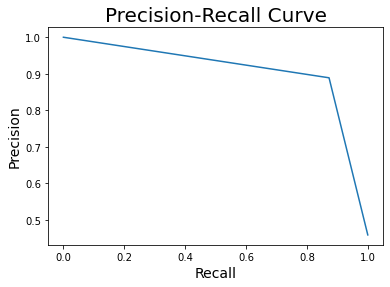

In [382]:
pr_curve(y_test, predict)

roc auc:0.8902097902097901


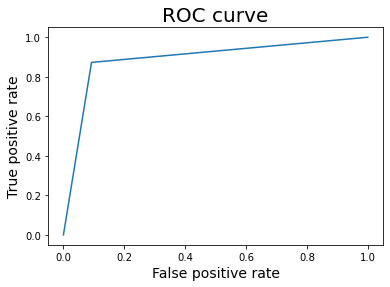

In [383]:
roc_curve(y_test, predict)

In [384]:
predict = model_tree.predict(X_train)

accuracy: 1.0 
     precision: 1.0 
     recall: 1.0 
     f1_score: 1.0


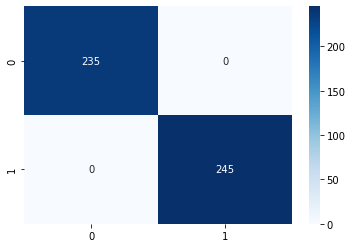

In [385]:
confussion_matrix(y_train, predict)

auc pr curve: 1.0


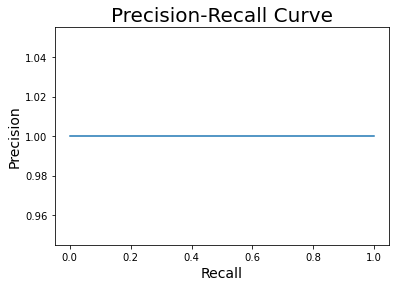

In [386]:
pr_curve(y_train, predict)

roc auc:1.0


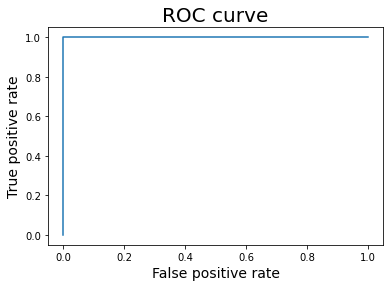

In [387]:
roc_curve(y_train, predict)

10:

In [388]:
model_tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10)

In [389]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10)

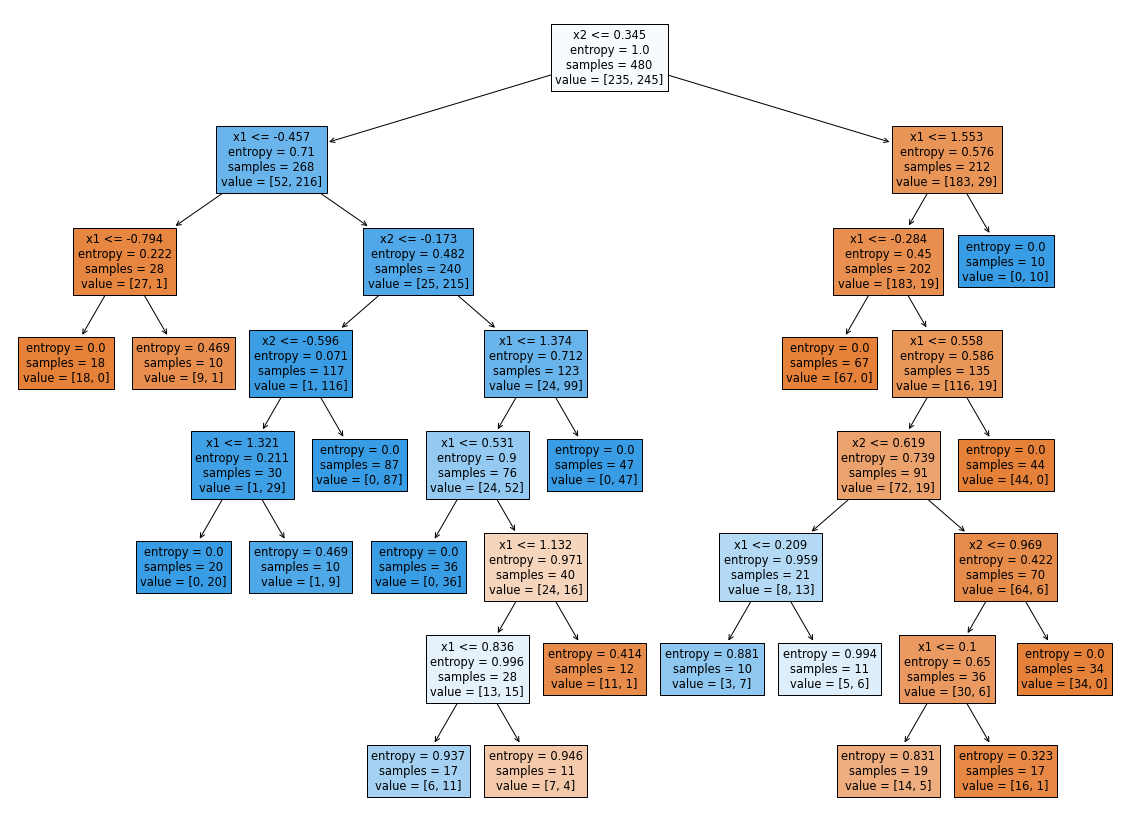

In [390]:
draw_tree(model_tree)

(<Figure size 432x432 with 1 Axes>, None, None)

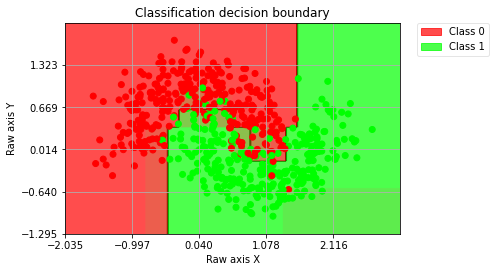

In [391]:
pylib.plot.plot_decision_boundary(model_tree, X=X, Y=y)

In [392]:
predict = model_tree.predict(X_test)

accuracy: 0.8916666666666667 
     precision: 0.92 
     recall: 0.8363636363636363 
     f1_score: 0.8761904761904761


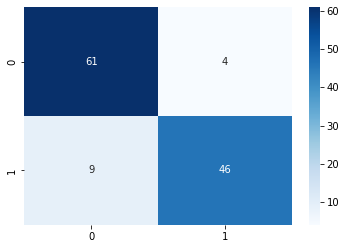

In [393]:
confussion_matrix(y_test, predict)

auc pr curve: 0.9156818181818182


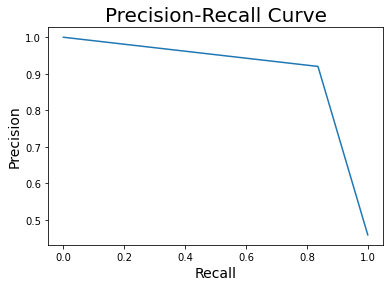

In [394]:
pr_curve(y_test, predict)

roc auc:0.8874125874125874


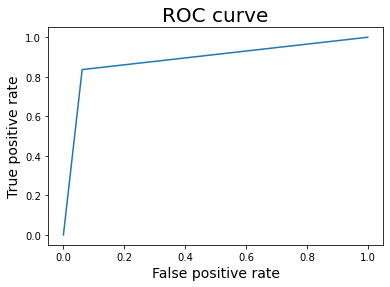

In [395]:
roc_curve(y_test, predict)

In [396]:
predict = model_tree.predict(X_train)

accuracy: 0.94375 
     precision: 0.9395161290322581 
     recall: 0.9510204081632653 
     f1_score: 0.9452332657200812


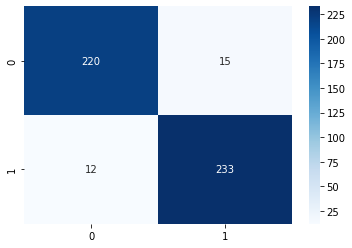

In [397]:
confussion_matrix(y_train, predict)

auc pr curve: 0.9577682685977617


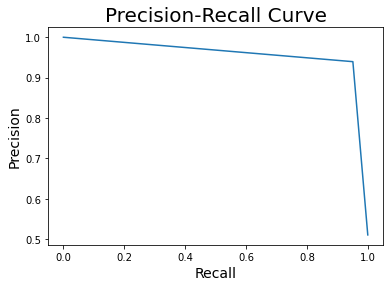

In [398]:
pr_curve(y_train, predict)

roc auc:0.9435953104646114


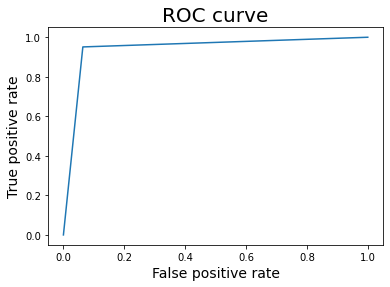

In [399]:
roc_curve(y_train, predict)

30:

In [400]:
model_tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=30)

In [401]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=30)

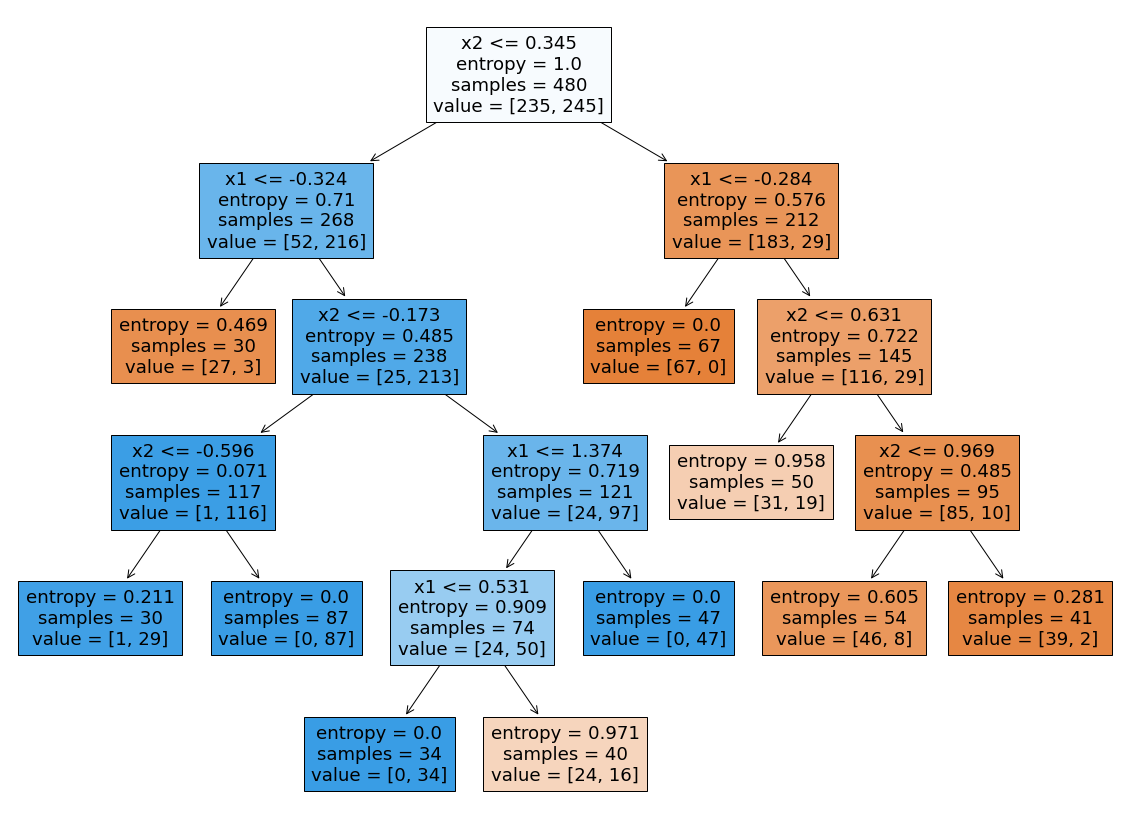

In [402]:
draw_tree(model_tree)

(<Figure size 432x432 with 1 Axes>, None, None)

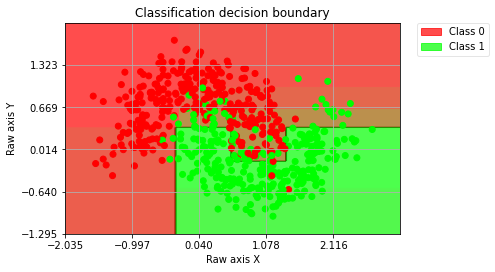

In [403]:
pylib.plot.plot_decision_boundary(model_tree, X=X, Y=y)

In [404]:
predict = model_tree.predict(X_test)

accuracy: 0.8416666666666667 
     precision: 0.9736842105263158 
     recall: 0.6727272727272727 
     f1_score: 0.7956989247311828


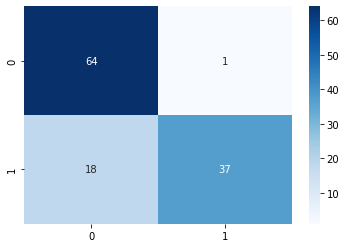

In [405]:
confussion_matrix(y_test, predict)

auc pr curve: 0.8982057416267942


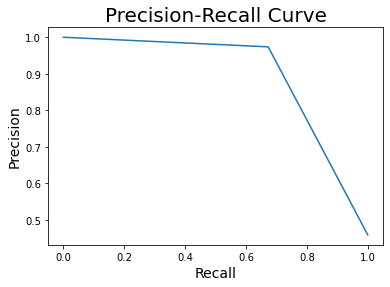

In [406]:
pr_curve(y_test, predict)

roc auc:0.8286713286713288


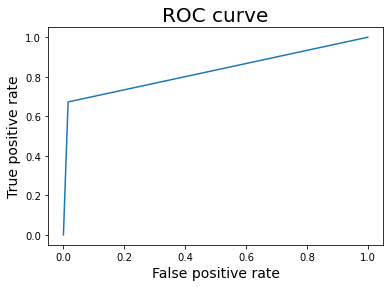

In [407]:
roc_curve(y_test, predict)

In [408]:
predict = model_tree.predict(X_train)

accuracy: 0.8979166666666667 
     precision: 0.9949494949494949 
     recall: 0.8040816326530612 
     f1_score: 0.8893905191873589


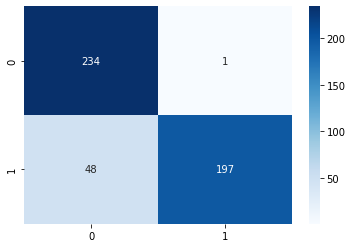

In [409]:
confussion_matrix(y_train, predict)

auc pr curve: 0.949515563801278


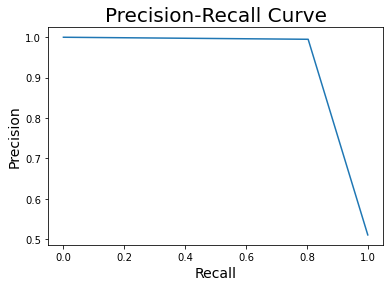

In [410]:
pr_curve(y_train, predict)

roc auc:0.8999131567520624


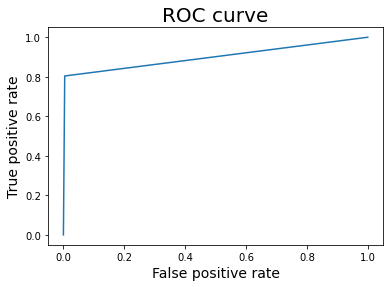

In [411]:
roc_curve(y_train, predict)

- <b> 1 (default) </b> <br>
Є ознаки перенавчання (оскільки ознака яка стоїть на default, то це дерево повторюється багато разів) <br>
- <b> 10 </b><br>
Значення для тестової вибірки таке же саме як і у min_samples_leaf=1, але для тестової значення усіх метрик менше  <br>
- <b> 30 </b><br>
Значення усіх метрик як для навчальної так і тестової вибірки менше, зрозуміло, що значення цього гіперпараметру повинно бути менше, модель <b> недонавчана  <br> 
<b>Ми не отримали ідеальне значення цього гіперпараметру, завдяки ньому можна попередити перенавчання, але у нас вийшло тільки досягти недонавчання, а значення між default, та завеликим не дало ніякого покращення по метрикам тестової вибірки, а зробило лише гірше для навчальної</b>


<font size='5'> max_leaf_nodes: </font> <br>
Ми будемо перевіряти такі значення: 
- 10
- 25
- None (default)

In [412]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10)

In [413]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10)

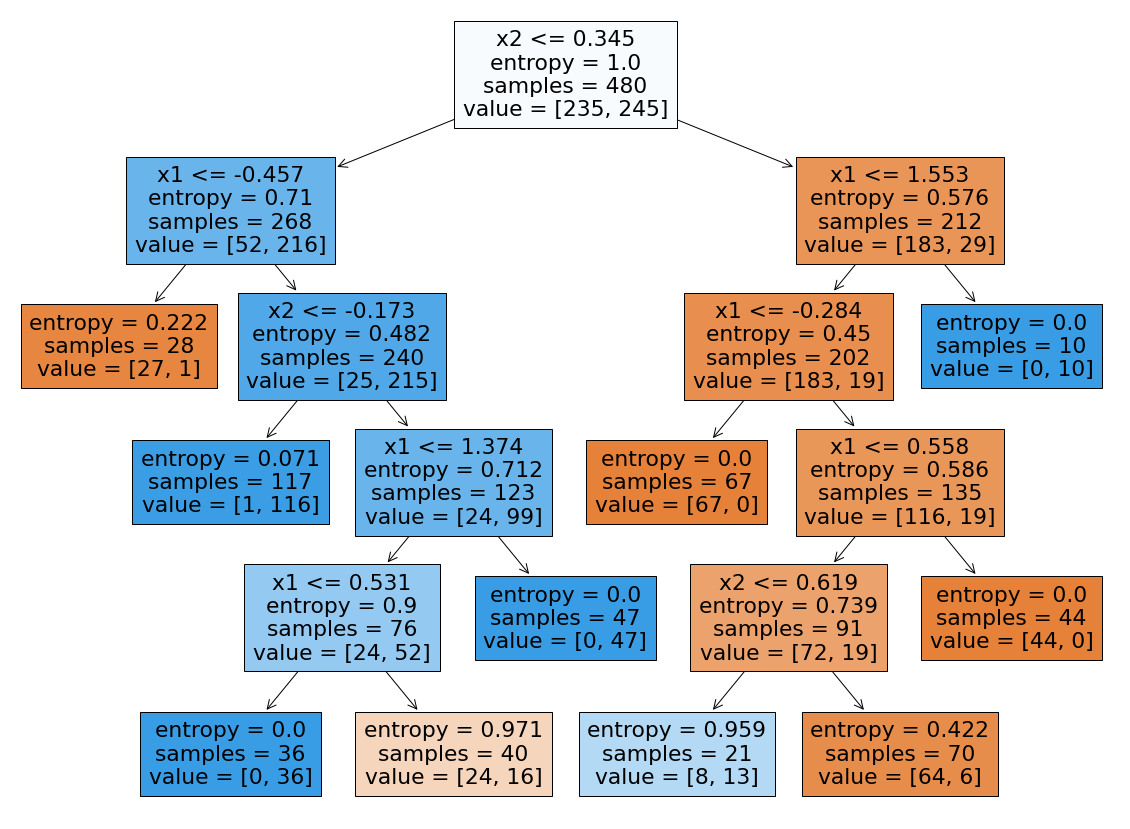

In [414]:
draw_tree(model_tree)

(<Figure size 432x432 with 1 Axes>, None, None)

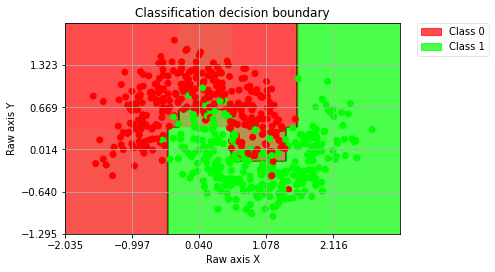

In [415]:
pylib.plot.plot_decision_boundary(model_tree, X=X, Y=y)

In [416]:
predict = model_tree.predict(X_test)

accuracy: 0.9 
     precision: 0.9777777777777777 
     recall: 0.8 
     f1_score: 0.8800000000000001


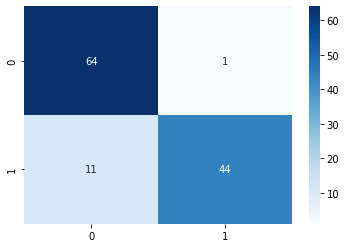

In [417]:
confussion_matrix(y_test, predict)

auc pr curve: 0.9347222222222222


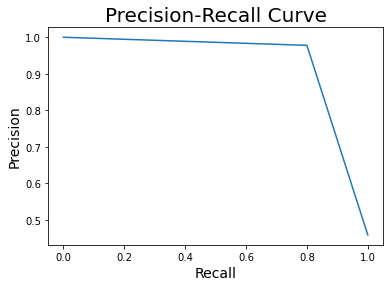

In [418]:
pr_curve(y_test, predict)

roc auc:0.8923076923076924


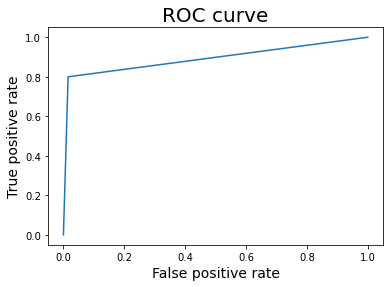

In [419]:
roc_curve(y_test, predict)

In [420]:
predict = model_tree.predict(X_train)

accuracy: 0.9333333333333333 
     precision: 0.961038961038961 
     recall: 0.9061224489795918 
     f1_score: 0.9327731092436975


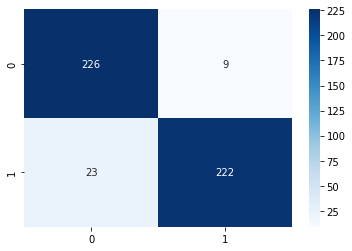

In [421]:
confussion_matrix(y_train, predict)

auc pr curve: 0.9575390383426099


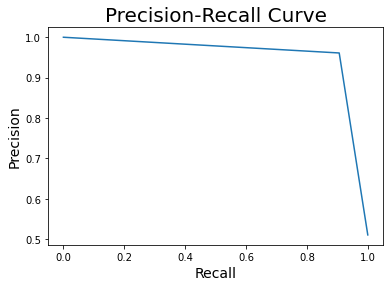

In [422]:
pr_curve(y_train, predict)

roc auc:0.9339122883195832


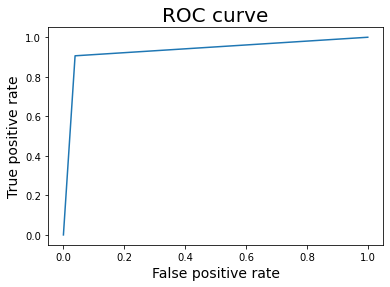

In [423]:
roc_curve(y_train, predict)

25:

In [424]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=25)

In [425]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=25)

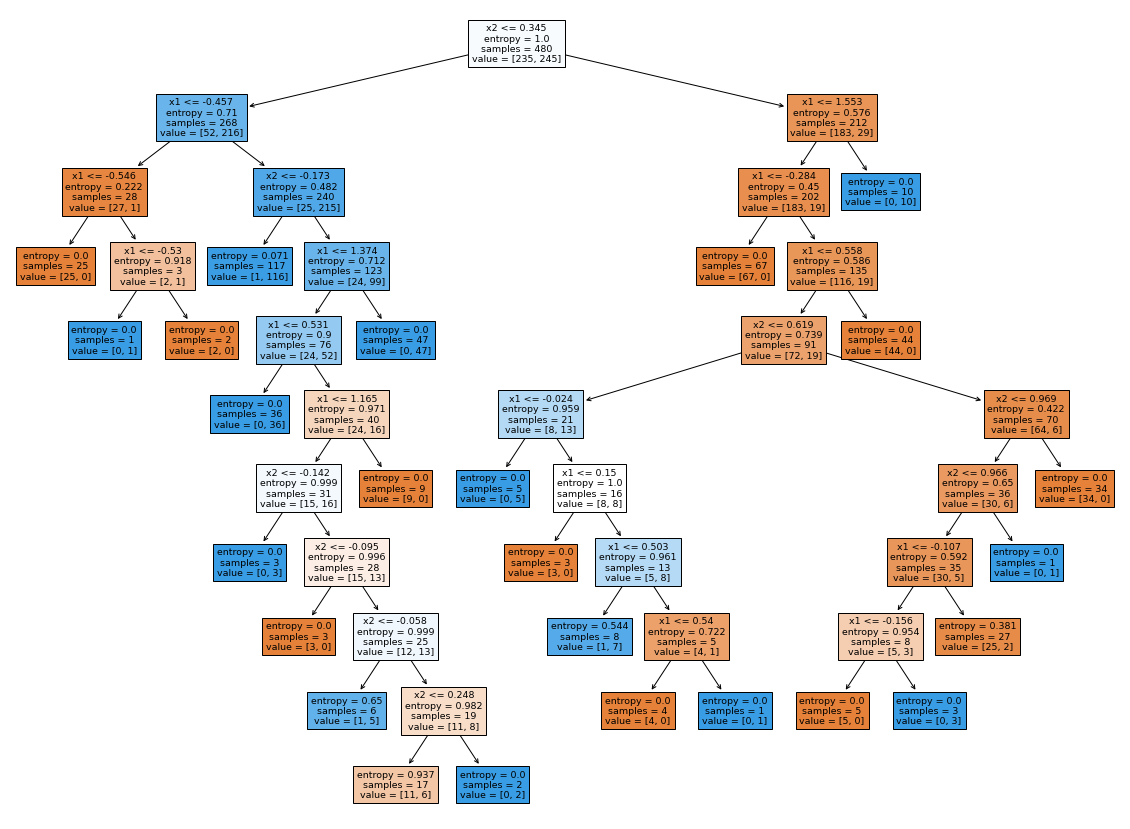

In [426]:
draw_tree(model_tree)

(<Figure size 432x432 with 1 Axes>, None, None)

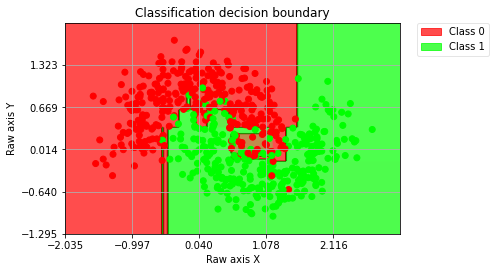

In [427]:
pylib.plot.plot_decision_boundary(model_tree, X=X, Y=y)

In [428]:
predict = model_tree.predict(X_test)

accuracy: 0.875 
     precision: 0.9 
     recall: 0.8181818181818182 
     f1_score: 0.8571428571428572


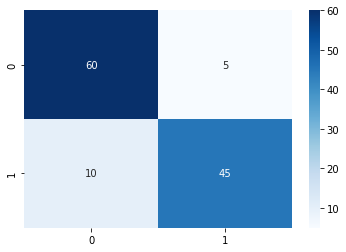

In [429]:
confussion_matrix(y_test, predict)

auc pr curve: 0.9007575757575758


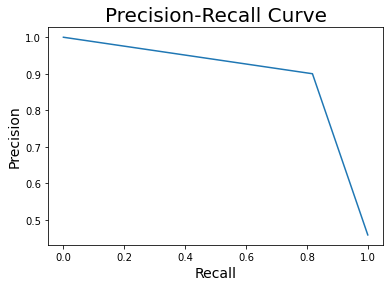

In [430]:
pr_curve(y_test, predict)

roc auc:0.8706293706293707


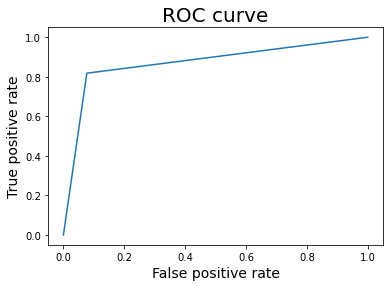

In [431]:
roc_curve(y_test, predict)

In [432]:
predict = model_tree.predict(X_train)

accuracy: 0.9770833333333333 
     precision: 0.9875 
     recall: 0.9673469387755103 
     f1_score: 0.9773195876288661


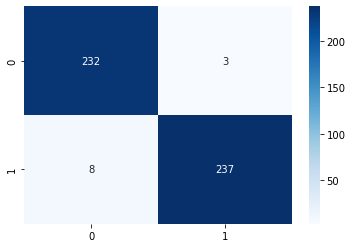

In [433]:
confussion_matrix(y_train, predict)

auc pr curve: 0.9857568027210885


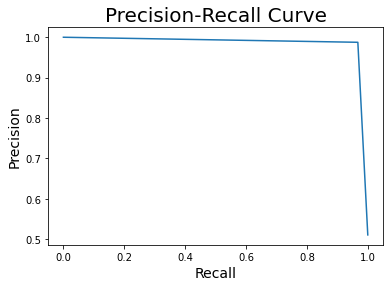

In [434]:
pr_curve(y_train, predict)

roc auc:0.9772904906643508


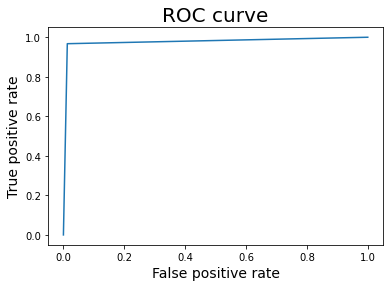

In [435]:
roc_curve(y_train, predict)

None:

In [436]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=None)

In [437]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [438]:
model_tree.get_n_leaves()

42

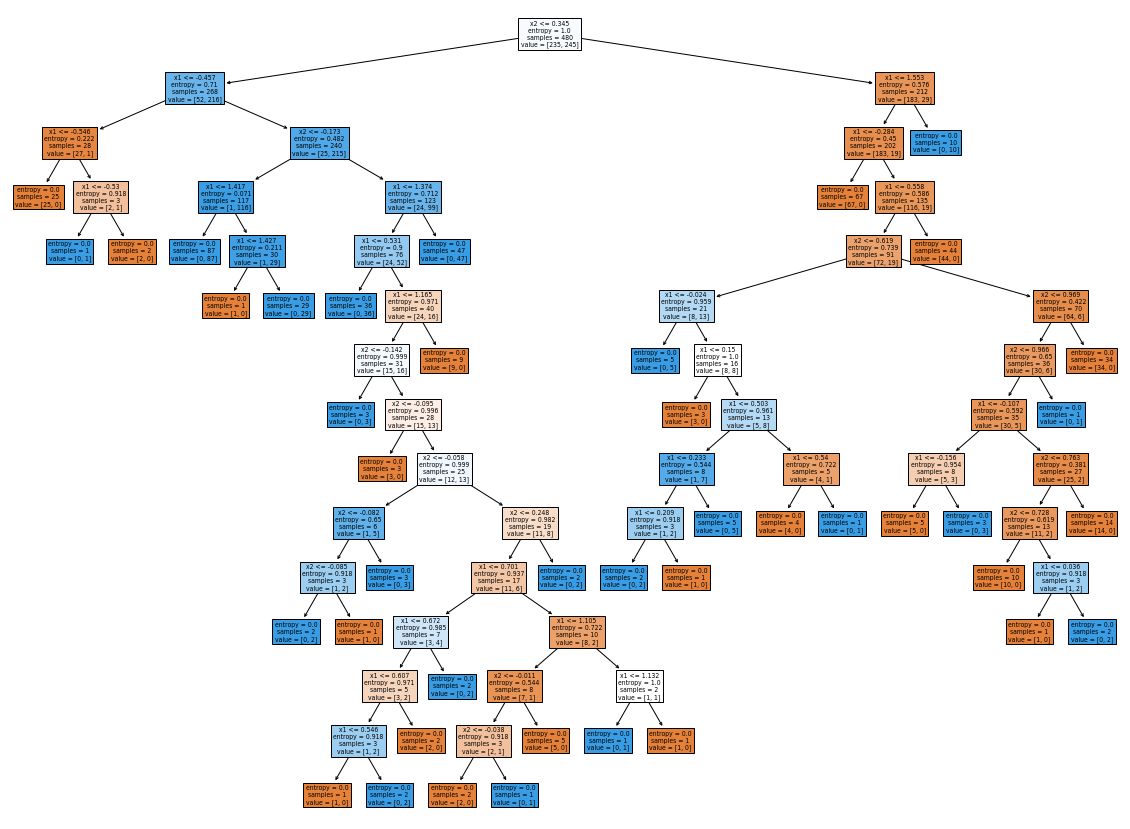

In [439]:
draw_tree(model_tree)

(<Figure size 432x432 with 1 Axes>, None, None)

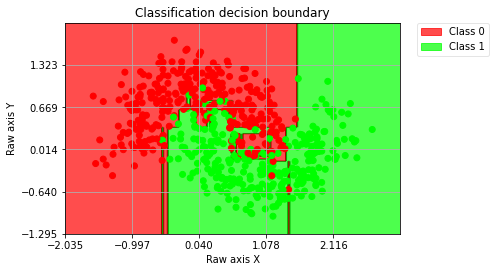

In [440]:
pylib.plot.plot_decision_boundary(model_tree, X=X, Y=y)

In [441]:
predict = model_tree.predict(X_test)

accuracy: 0.8916666666666667 
     precision: 0.8888888888888888 
     recall: 0.8727272727272727 
     f1_score: 0.8807339449541284


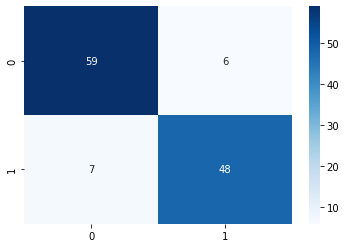

In [442]:
confussion_matrix(y_test, predict)

auc pr curve: 0.9099747474747475


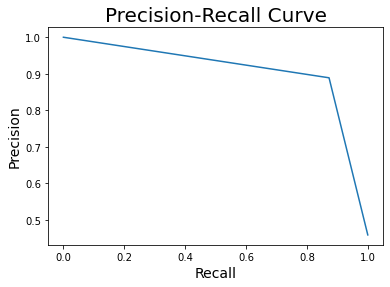

In [443]:
pr_curve(y_test, predict)

roc auc:0.8902097902097901


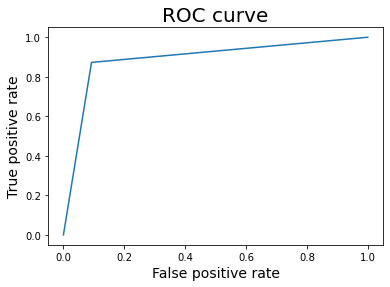

In [444]:
roc_curve(y_test, predict)

In [445]:
predict = model_tree.predict(X_train)

accuracy: 1.0 
     precision: 1.0 
     recall: 1.0 
     f1_score: 1.0


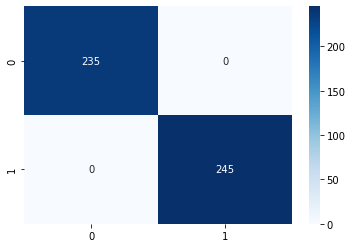

In [446]:
confussion_matrix(y_train, predict)

auc pr curve: 1.0


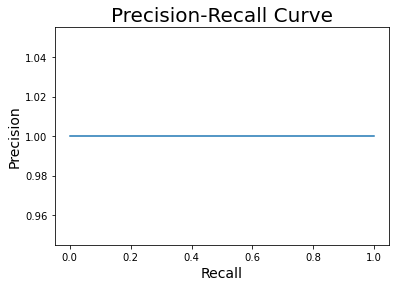

In [447]:
pr_curve(y_train, predict)

roc auc:1.0


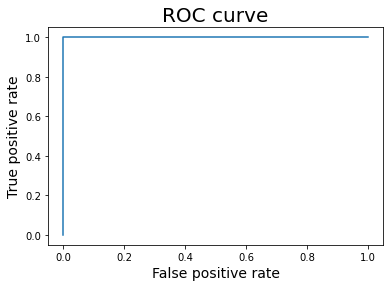

In [448]:
roc_curve(y_train, predict)

- <b> 10 </b> <br>
Дерево стало помітно менше, але якість моделі на тестовій виборці стала краща по точності, але по іншим параметрам трохи гірше <br>
- <b>25 </b><br>
Дерево стало більше, але це не допомогло на тестовій виборці, на ній значення метрик стало менше, сама модель стала більш перенавченою, можливо просто невдале число і невдала сама тестова вибірка де закономірності не такі які знайшла модель <br>
- <b> None (default) </b><br>
Є ознаки перенавчання (оскільки ознака яка стоїть на default, то це дерево повторюється багато разів) <br> 
<b>Дуже складний та чуттєвий параметр для налаштування, у default значення get_n_leaves()=42, що означає найкраща модель на навчальній виборці отримала 42 вузла, що цікаво, адже max_leaf_nodes=10, виявилося краще ніж max_leaf_nodes=25, тобто нам потрібно було ще збільшувати значення, хоч і це збільшення дало результат гірше (як я вже казав це просто невдале число), це означає, що вручну налаштувати параметр може бути дуже складно, та часозатратно  </b>


<font size='5'> max_features: </font> <br>
Ми будемо перевіряти такі значення: 
- 1
- 2 <br>
(усього 2 ознаки)

In [449]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_features=1)

In [450]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features=1)

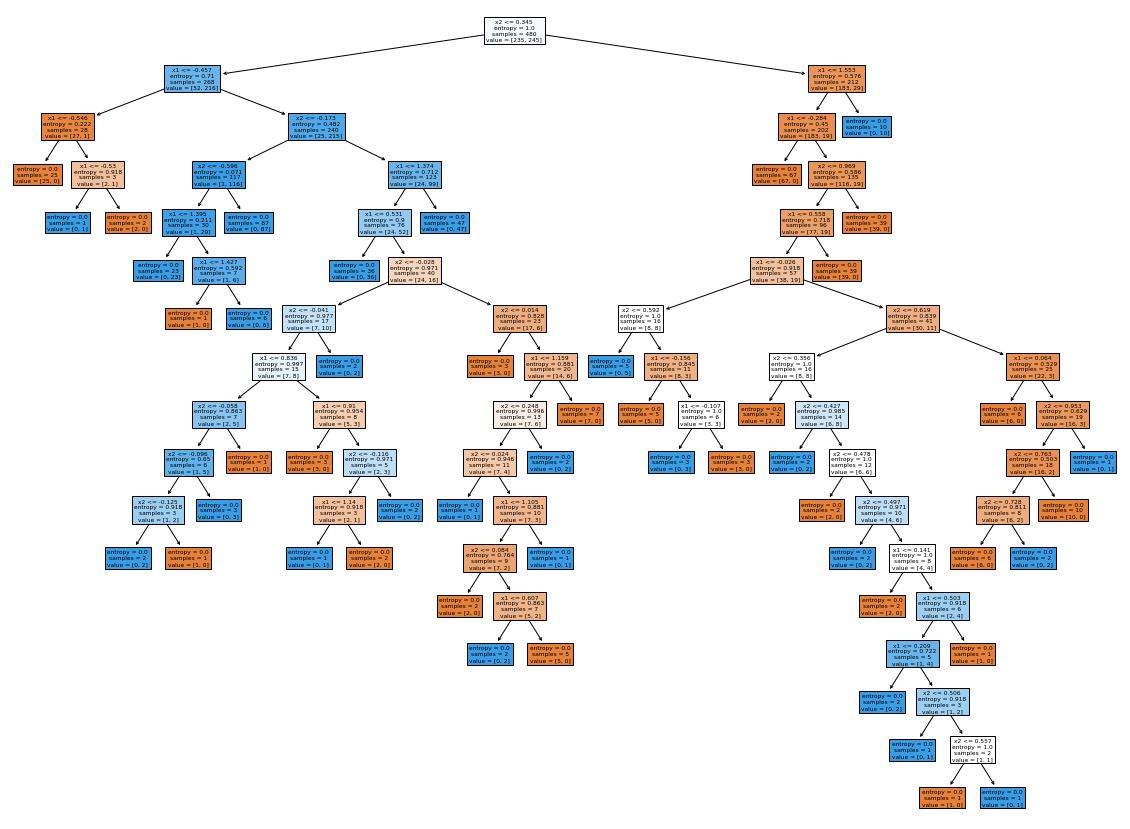

In [451]:
draw_tree(model_tree)

(<Figure size 432x432 with 1 Axes>, None, None)

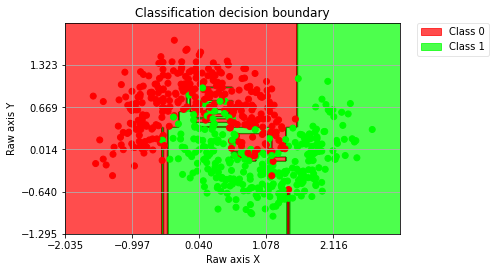

In [452]:
pylib.plot.plot_decision_boundary(model_tree, X=X, Y=y)

In [453]:
predict = model_tree.predict(X_test)

accuracy: 0.9083333333333333 
     precision: 0.8928571428571429 
     recall: 0.9090909090909091 
     f1_score: 0.9009009009009009


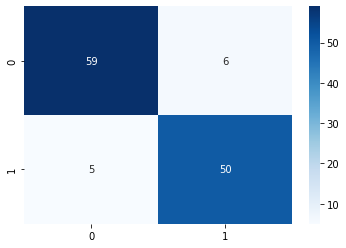

In [454]:
confussion_matrix(y_test, predict)

auc pr curve: 0.9218073593073594


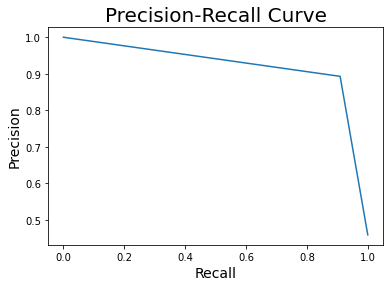

In [455]:
pr_curve(y_test, predict)

roc auc:0.9083916083916085


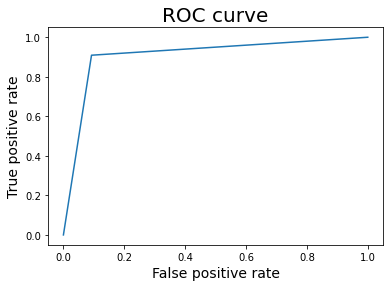

In [456]:
roc_curve(y_test, predict)

In [457]:
predict = model_tree.predict(X_train)

accuracy: 1.0 
     precision: 1.0 
     recall: 1.0 
     f1_score: 1.0


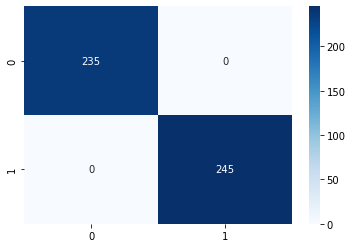

In [458]:
confussion_matrix(y_train, predict)

auc pr curve: 1.0


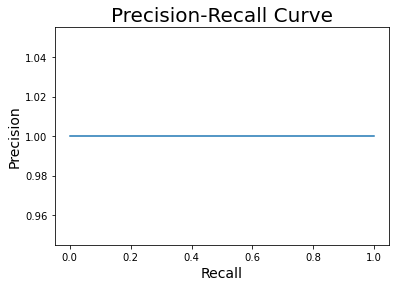

In [459]:
pr_curve(y_train, predict)

roc auc:1.0


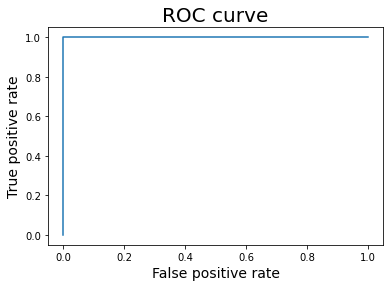

In [460]:
roc_curve(y_train, predict)

2:

In [461]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_features=2)

In [462]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features=2)

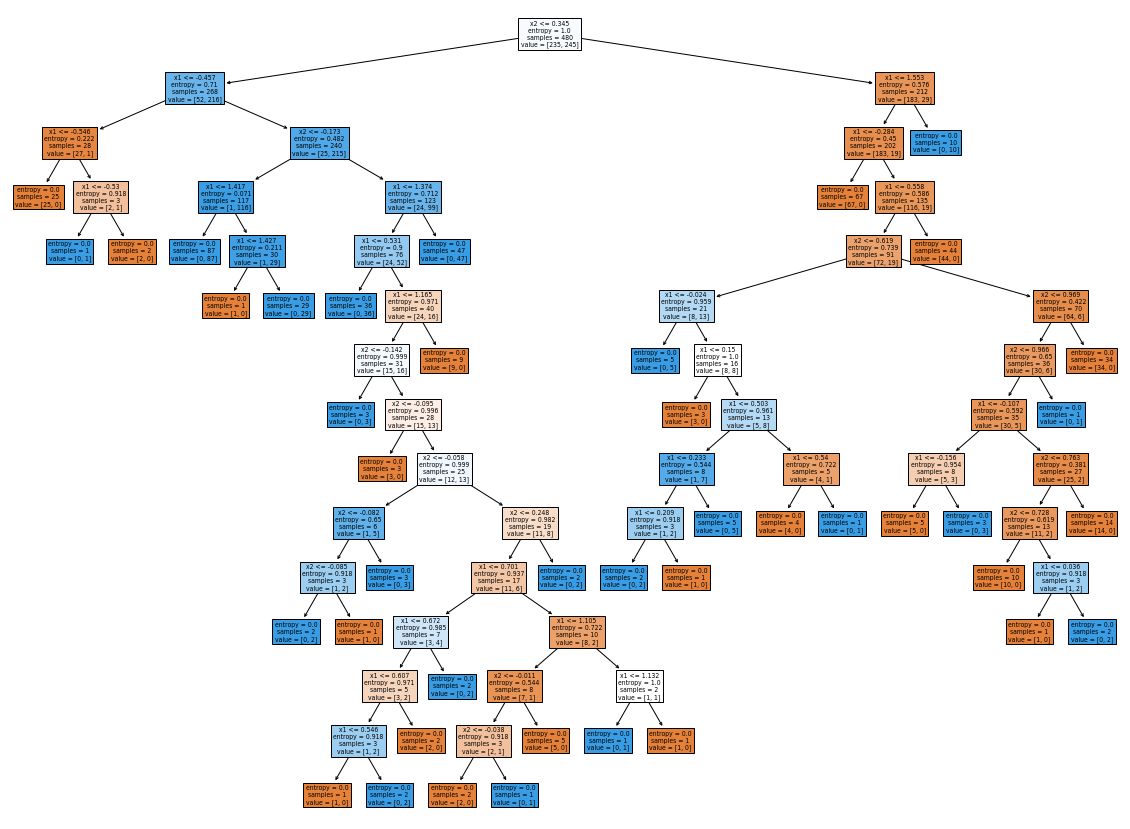

In [463]:
draw_tree(model_tree)

(<Figure size 432x432 with 1 Axes>, None, None)

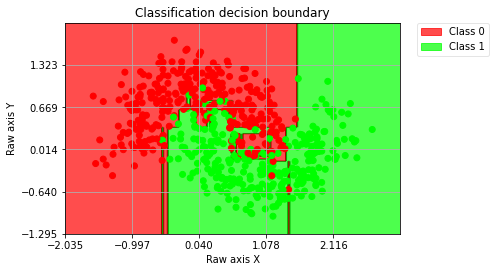

In [464]:
pylib.plot.plot_decision_boundary(model_tree, X=X, Y=y)

In [465]:
predict = model_tree.predict(X_test)

accuracy: 0.8916666666666667 
     precision: 0.8888888888888888 
     recall: 0.8727272727272727 
     f1_score: 0.8807339449541284


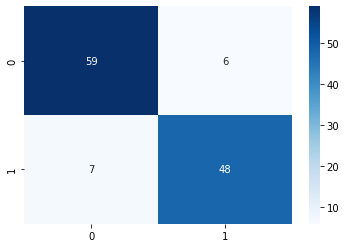

In [466]:
confussion_matrix(y_test, predict)

auc pr curve: 0.9099747474747475


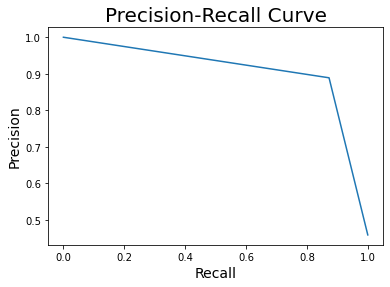

In [467]:
pr_curve(y_test, predict)

roc auc:0.8902097902097901


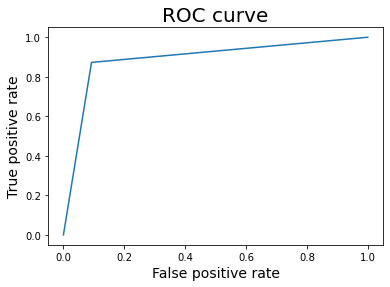

In [468]:
roc_curve(y_test, predict)

In [469]:
predict = model_tree.predict(X_train)

accuracy: 1.0 
     precision: 1.0 
     recall: 1.0 
     f1_score: 1.0


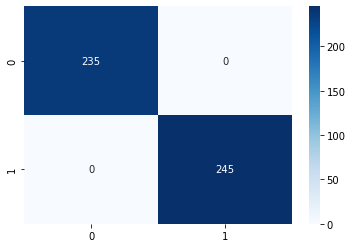

In [470]:
confussion_matrix(y_train, predict)

auc pr curve: 1.0


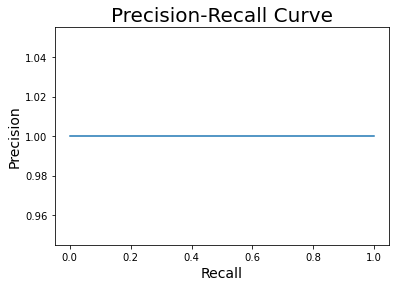

In [471]:
pr_curve(y_train, predict)

roc auc:1.0


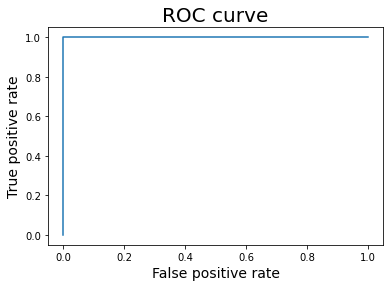

In [472]:
roc_curve(y_train, predict)

<b> Саме значення метрик краще для max_features=1, і дерево виглядає інакше, але оскільки подивившись на дерева я не знайшов місце, де max_features=2 використовує дві ознаки на одному вузлі, то моє припущення таке: через трохи різні алгоритми воно отримувало різні значення ентропії і тому по різному ділила, що і дало різні дерева, краще значення на тестовій виборці це лише випадковість </b>

<font size='5'> Пошукаємо найкращі параметри через GridSearchCV (будемо використовувати ті параметри які було розглянуто вище)</font>

In [473]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth' : [3, 7, None],
              'min_samples_split' : [2, 5, 10],
              'min_samples_leaf' : [1, 10, 30],
              'max_leaf_nodes' : [10, 25, None],
              'max_features' : [1, 2]}

GS = GridSearchCV(estimator = DecisionTreeClassifier(),
                  param_grid = param_grid,
                  scoring = 'accuracy',
                  n_jobs = -1)
GS.fit(X_train, y_train)

print(GS.best_score_)
print(GS.best_params_)

0.9020833333333333
{'max_depth': 7, 'max_features': 2, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


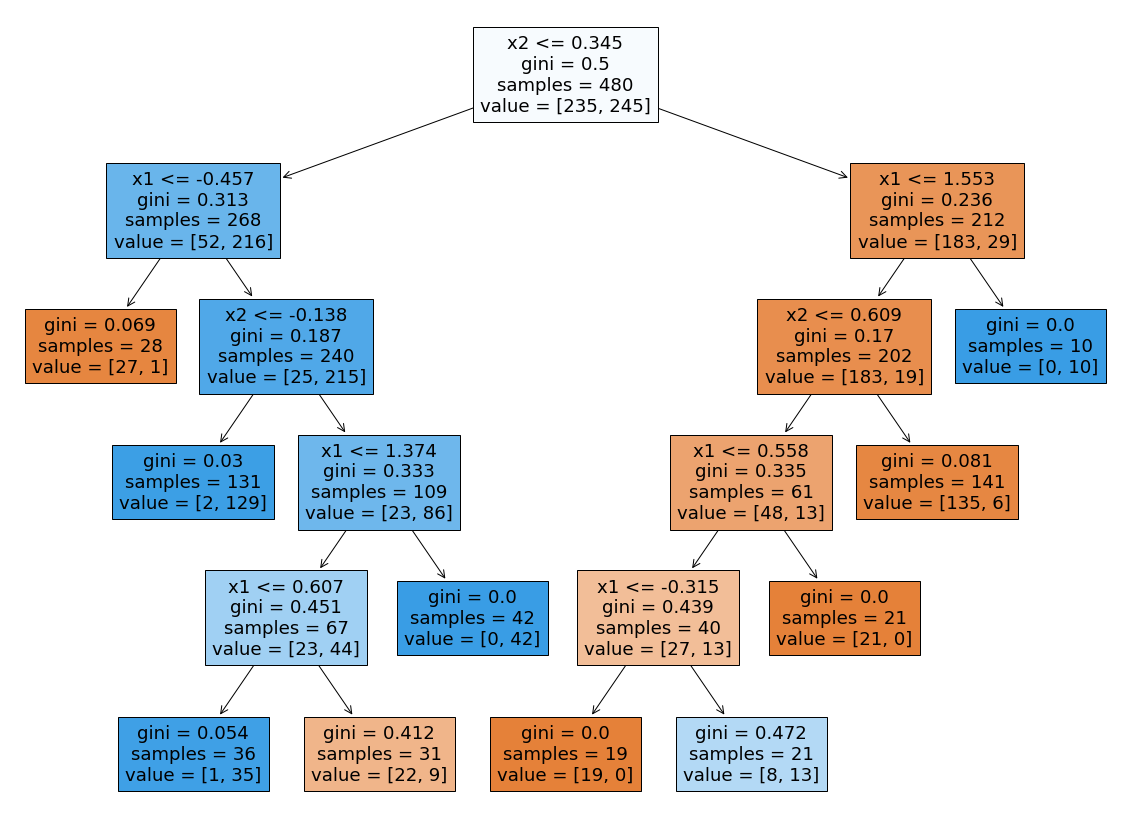

In [488]:
draw_tree(GS.best_estimator_)

(<Figure size 432x432 with 1 Axes>, None, None)

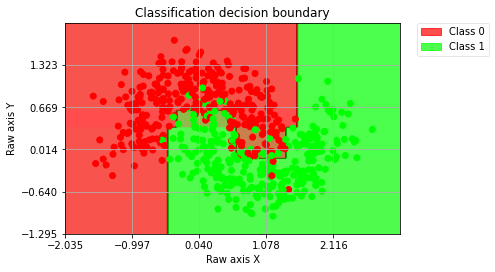

In [489]:
pylib.plot.plot_decision_boundary(GS.best_estimator_, X=X, Y=y)

In [490]:
predict = GS.best_estimator_.predict(X_test)

accuracy: 0.9083333333333333 
     precision: 0.9583333333333334 
     recall: 0.8363636363636363 
     f1_score: 0.8932038834951457


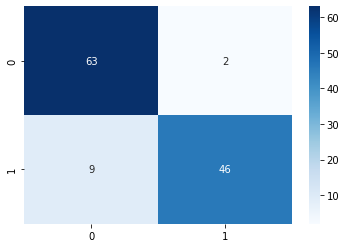

In [491]:
confussion_matrix(y_test, predict)

auc pr curve: 0.9348484848484849


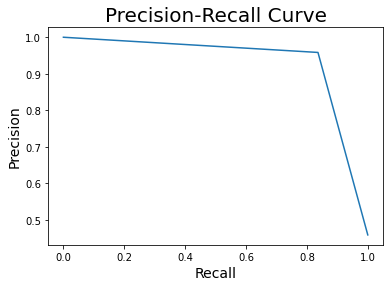

In [492]:
pr_curve(y_test, predict)

roc auc:0.9027972027972028


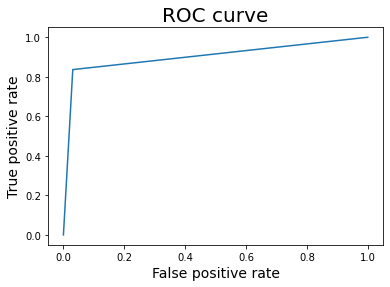

In [493]:
roc_curve(y_test, predict)

In [494]:
predict = GS.best_estimator_.predict(X_train)

accuracy: 0.94375 
     precision: 0.9541666666666667 
     recall: 0.9346938775510204 
     f1_score: 0.9443298969072165


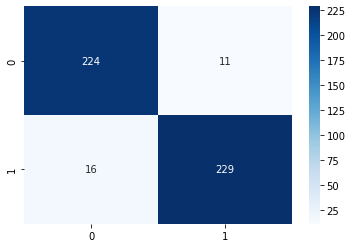

In [495]:
confussion_matrix(y_train, predict)

auc pr curve: 0.9610969387755103


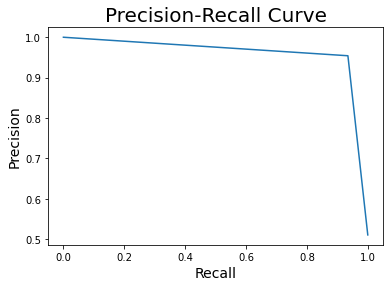

In [496]:
pr_curve(y_train, predict)

roc auc:0.9439426834563613


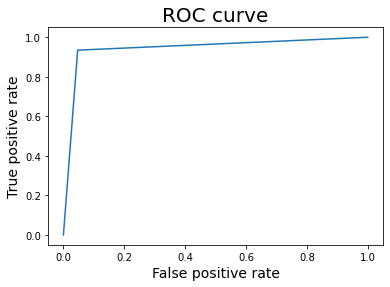

In [497]:
roc_curve(y_train, predict)

<b>Завдяки решітчастому пошуку ми отримали одну із найкращих значень точності (схоже на max_features=1, цікаво, що саме такий параметр був найкращим для max_features).
Загалом наша модель стала меншою, вона більш загально покриває наші дані, що і дає більше значення на тестовій вибірці, але менше на навчальній.
Важливо, що ми не отримали таку ж саму модель як і з default значеннями параметрів, це дало нам розуміння, що налаштовування гіперпараметрів має суттєве значення для отримання гарної моделі.
 </b>
